# Assignment 3: Linear Regression (100 points)

Only use the already imported library `numpy` and the Python standard library. Make sure that the datasets `dataLinReg2D.txt`, `dataQuadReg2D.txt` and `dataQuadReg2D_noisy.txt` are in the same directory as the notebook.


Jugal Yadav (3510720) M.Sc. Computer Science

Suganth Natarajan (3522323) M.Sc. Autonome Systeme

Abdul Rehman (3440146) M.Sc. INFOTECH

## Task 1: Linear Regression - theory (10 points)
1) *(4 points)* Linear regression can have nonlinear input features, why is it still called linear regression? In what sense is it linear?

In [ ]:
Linear regression is called linear becuase the relationship between the output(Y) and input feature(X) is linear. Moreover, if the model satifies the following relationship
                                Y = Beta_0 + Beta_1 * X1 (Lecture slides)

2) *(3 points)* For calculating optimal parameters $\hat{\beta}$ the inverse of $X^{\top}X$ has to be calculated. When would this matrix be singular?

==> *Write your response here.* (double klick here to edit)

3) *(3 points)* Why does the optimization problem for $L_1$-regularization (Lasso) not have a closed form solution?

Lasso Regression exclude some extra variables(features) that might be useful for creating a model and prediction and it provides a slope exactly equals to zero.

## Task 2: Ridge Regression for Polynomial 2D Functions (70 points)
Each line in the data sets consists of a data entry `(x,y)` with a 2D point `x` and a 1D function output `y`.

In [2]:
# Load required packages and datasets. Do not modify.
import numpy as np
import matplotlib.pyplot as plt

def load_dataset(path):
    data = np.loadtxt(path)
    X, y = data[:, :2], data[:, 2]
    
    return X, y
    

X_lin, y_lin = load_dataset("dataLinReg2D.txt")
X_quad, y_quad = load_dataset("dataQuadReg2D.txt")
X_noise, y_noise = load_dataset("dataQuadReg2D_noisy.txt")

1) *(5 points)* Draw random samples from the dataset for training, use 70% of the data. Do not modify the interface of the function. Do this for `X_quad` and `X_noise`.

In [3]:
def train_split(X, y, test_split = 0.7):
    """
    Returns X_train, y_train
        where X_train are random samples of X and y_train are the corresponding true values.
        test_split represents the persentage of how many training samples are drawn from X.
    """
    # Implement your solution here.
    np.random.seed(2020) 
    
    threshold = int(test_split*X.shape[0])
    rnd_idx = np.random.permutation(X.shape[0])
    
    X_train = X[rnd_idx[:threshold]]
    y_train = y[rnd_idx[:threshold]]
    return X_train, y_train

X_quad_train, y_quad_train = train_split(X_quad, y_quad)
X_noise_train, y_noise_train = train_split(X_noise, y_noise)

2) *(10 points)* Extend the `make_features` method to also compute quadratic features (`ftype = 'quad'`).

In [4]:
def make_features(X, ftype='lin'):
    """
    generates features from input data, returns Phi.
    ftype is used to distinguish types of features
    """
    n, d = X.shape
    
    if ftype == 'lin': 
        # Linear feature transformation (including intercept)
        Phi = np.empty((n, d+1))
        Phi[:, 0] = 1
        Phi[:, 1:] = X
        
    elif ftype == 'quad':
        # Quadratic feature transformation
        dim = int(1 + (d + (d*(d + 1))/2))
        temp_x_1 = X[:, 0]
        temp_x_2 = X[:, 1]
        x_1_sq = temp_x_1*temp_x_1
        x_1_x_2 = temp_x_1*temp_x_2
        x_2_sq = temp_x_2 * temp_x_2
        feat = np.array([x_1_sq, x_1_x_2, x_2_sq])
        Phi = np.empty((n, dim))
        Phi[:, 0] = 1
        Phi[:, 1:d+1] = X
        Phi[:, d+1:] = feat.T
        
        # Implement your solution here.
    
    else:
        raise Exception(f'Feature type {ftype} not implemented yet')
    
    return Phi

3) *(10 points)* Implement Ridge Regression to fit a polynomial function to the data sets with the regularization parameter `lambda_` and feature type `ftype`.

Fill out the methods in `RidgeRegression` to train (`fit`) and predict (`predict`). Feel free to introduce new fields and methods based on your needs, but the methods `fit` and `predict` are required and their interface should not be changed. You need to store the vector of regression coefficients in the field `self.beta`. Before calculating the inverse check if the determinant is non-zero.

In [17]:
class RidgeRegression(object):
    def __init__(self, lambda_, ftype = 'lin'):
        self.lambda_ = lambda_
        self.ftype = ftype
        self.beta = None  # Learned regression coefficients.
    
    def fit(self, X, y):
        """
        X is an array of shape (n, d), 
            where n is the number of samples and d is the number of features.
        y is an array of shape (n,)
        """
        
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        n,m = Phi.shape
        I = np.identity(m)
        self.beta = np.dot(np.dot(np.linalg.inv(np.dot(Phi.T, Phi) + self.lambda_ * I), Phi.T), y)
    
    def predict(self, X):
        """
        X is an array with shape (n, d).
        The method returns an array of shape (n,).
        """
        Phi = make_features(X, self.ftype)
        
        # Implement your solution here.
        
        return Phi.dot(self.beta)
#p = RidgeRegression(2)
#p.lambda_ = 2
#p.fit(X_lin,y_lin)

4) *(5 points)* Implement the function `MSE` to compute the mean squared error. `y_pred` and `y_true` are the vectors of predicted and true function outputs respectively with shape `(n,)`, where `n` is the number of samples. The function returns a single float.

In [18]:
def MSE(y_pred, y_true):
    """
    return the mean squared error of y_pred and y_true
    """
    n=y_true.shape[0]
    return np.sum((y_pred-y_true)**2)/n

5) *(30 points)* Evaluate your Ridge Regression model with linear features on the linear `(X_lin, y_lin)` data set. Report the MSE on the full data set when trained on the full dataset. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis. print the minimal `lambda_`.

How does it perform with quadratic features on this data set?

MSE: 0.00974934949734071, feature type: quad
MSE: 0.010247981453700135, feature type: lin
MSE: 0.009745481794485257, feature type: quad
MSE: 0.010260969845439102, feature type: lin
MSE: 0.009761525193961847, feature type: quad
MSE: 0.01029965210377027, feature type: lin
MSE: 0.009809148395436148, feature type: quad
MSE: 0.010363609137155543, feature type: lin
MSE: 0.009887606418805615, feature type: quad
MSE: 0.010452428794063664, feature type: lin
MSE: 0.009996174426876057, feature type: quad
MSE: 0.010565705733970776, feature type: lin
MSE: 0.010134147067078703, feature type: quad
MSE: 0.010703041301076008, feature type: lin
MSE: 0.010300837838543122, feature type: quad
MSE: 0.010864043400668157, feature type: lin
MSE: 0.01049557848340573, feature type: quad
MSE: 0.011048326378080559, feature type: lin
MSE: 0.010717718401289962, feature type: quad
MSE: 0.011255510900173347, feature type: lin
MSE: 0.010966624085946038, feature type: quad
MSE: 0.011485223839283938, feature type: lin
MS

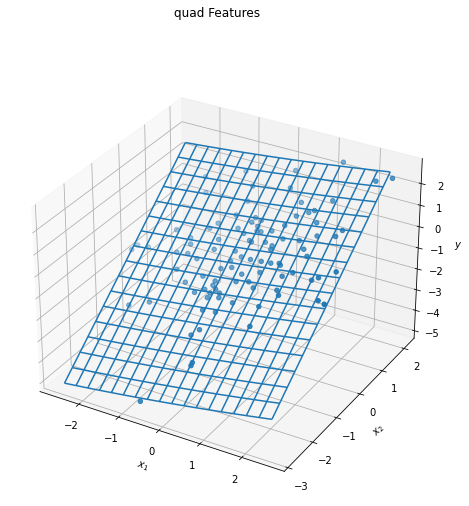

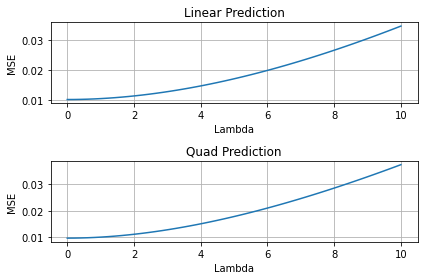

In [29]:
import matplotlib.pyplot as plt

def train_evaluate(regression_model, X, y):
    """
    Use X and y to fit the regression_model and make prediction over the same dataset.
    Print the error
    """
    regression_model.fit(X, y)
    yhat = regression_model.predict(X)
    print(f'MSE: {MSE(yhat, y)}, feature type: {regression_model.ftype}')
    return MSE(yhat, y)
    
def plot_data_and_model(regression_model, X, y):
    """
    Generates a 3D plot of the regression result including the true underlying data.
    The data points are indicated by circles, the prediction is shown as a surface
    """
    fig = plt.figure(figsize=(8, 8))
    plt.suptitle(f'{regression_model.ftype} Features')
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], y, marker = 'o')
    
    x_min = X.min(0)
    x_max = X.max(0)

    x0_grid, x1_grid = np.mgrid[x_min[0]:x_max[0]:.3, x_min[1]:x_max[1]:.3]

    x_dim_0, x_dim_1 = np.shape(x0_grid)
    x_size = np.size(x0_grid)

    x0_hat = x0_grid.flatten()
    x1_hat = x1_grid.flatten()
    x0_hat = x0_hat.reshape((np.size(x0_hat), 1))
    x1_hat = x1_hat.reshape((np.size(x1_hat), 1))
    x_hat = np.append(x0_hat, x1_hat, 1)
    x_hat_fv = make_features(x_hat, regression_model.ftype)
    y_hat = x_hat_fv.dot(regression_model.beta)
    y_grid = y_hat.reshape((x_dim_0, x_dim_1))
    ax.plot_wireframe(x0_grid, x1_grid, y_grid)
    ax.auto_scale_xyz([x_min[0], x_max[0]], [x_min[1], x_max[1]], [y.min(), y.max()])
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$y$')
    
# Implement your solution here.
regression_linear = RidgeRegression(lambda_=0.1, ftype='quad')
train_evaluate(regression_linear, X_lin, y_lin)
plot_data_and_model(regression_linear, X_lin, y_lin)

lambdas=np.linspace(0,10,50)
MSE_lambdas_lin=np.zeros(lambdas.shape)
MSE_lambdas_quad=np.zeros(lambdas.shape)
for ind,l in enumerate(lambdas):
    regression_lin = RidgeRegression(lambda_=l, ftype='lin')
    MSE_lambdas_lin[ind]=train_evaluate(regression_lin, X_lin, y_lin)
    regression_quad = RidgeRegression(lambda_=l, ftype='quad')
    MSE_lambdas_quad[ind]=train_evaluate(regression_quad, X_lin, y_lin)
    

fig, axs = plt.subplots(2, 1)
axs[0].set_title('Linear Prediction')
axs[0].plot(lambdas,MSE_lambdas_lin)
axs[0].set_xlabel('Lambda')
axs[0].set_ylabel('MSE')
axs[0].grid(True)

axs[1].set_title('Quad Prediction')
axs[1].plot(lambdas,MSE_lambdas_quad)
axs[1].set_xlabel('Lambda')
axs[1].set_ylabel('MSE')
axs[1].grid(True)
fig.tight_layout()
plt.show()

6) *(5 points)* Evaluate the quadratic dataset `(X_quad, y_quad)` for different values of `lambda_`. Report the MSE on the full data set when trained on the partial dataset `(X_quad_train, y_quad_train)`. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis. print the minimal `lambda_`.

Plot the surface and data points of the best `lambda_` value using the function `plot_data_and_model`.

Lambda: 0.20408163265306123
MSE: 0.01146041470891602, feature type: quad


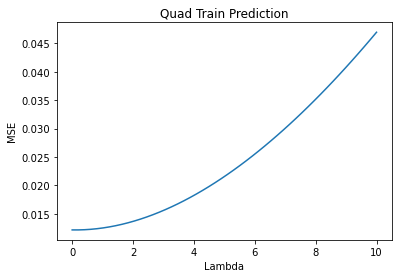

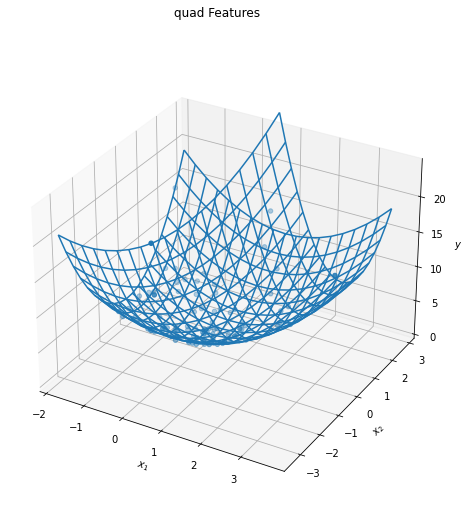

In [30]:
# Implement your solution here.
lambdas=np.linspace(0,10,50)
error = np.zeros(lambdas.size)
MSE_lambdas_quad=np.zeros(lambdas.shape)
for ind,l in enumerate(lambdas):
    regression_quad = RidgeRegression(lambda_=lambdas[ind], ftype='quad')
    regression_quad.fit(X_quad_train, y_quad_train)
    yhat = regression_quad.predict(X_quad)
    error[ind] = MSE(yhat, y_quad)
min_error = error.argmin()
print('Lambda:', lambdas[min_error])

plt.figure()
plt.title('Quad Train Prediction')
lin =plt.plot(lambdas,error)
plt.xlabel('Lambda')
plt.ylabel('MSE')

regression_quad = RidgeRegression(lambda_=0.1, ftype='quad')
train_evaluate(regression_quad, X_quad_train, y_quad_train)
plot_data_and_model(regression_quad, X_quad, y_quad)


7) *(5 points)* Evaluate the noisy dataset `(X_noise, y_noise)` for different values of `lambda_`. Report the MSE on the full data set when trained on the partial dataset `(X_noise_train, y_noise_train)`. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis.

Plot the surface and data points of the best `lambda_` value using the function `plot_data_and_model`.

Lambda: 0.0
MSE: 24.14925468717181, feature type: quad


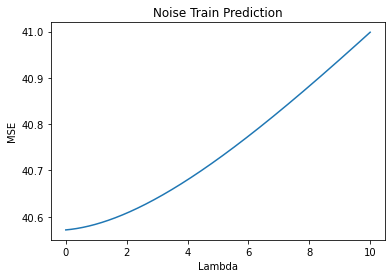

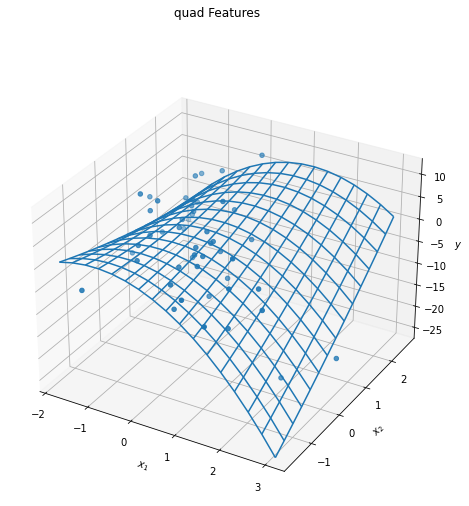

In [31]:
# Implement your solution here.
lambdas=np.linspace(0,10,500)
error = np.zeros(lambdas.size)
for ind,l in enumerate(lambdas):
    regression_noise = RidgeRegression(lambda_=lambdas[ind], ftype='lin')
    regression_noise.fit(X_noise_train, y_noise_train)
    yhat = regression_noise.predict(X_noise)
    error[ind] = MSE(yhat, y_noise)
min_error = error.argmin()
print('Lambda:', lambdas[min_error])

plt.figure()
plt.title('Noise Train Prediction')
lin =plt.plot(lambdas,error)
plt.xlabel('Lambda')
plt.ylabel('MSE')

regression_noise = RidgeRegression(lambda_=0.01, ftype='quad')
train_evaluate(regression_noise, X_noise_train, y_noise_train)
plot_data_and_model(regression_noise, X_noise, y_noise)

## Task 3 Evaluation (20 points)

1) *(5 points)* What was the best choice for regularization term `lambda_` in the models above? Explain the observation from the previous task? If `lambda_` is set to zero $\hat{\beta}$ is not regularized, when would $\lambda = 0$ be a good choice?

Choose the lambda as low as possible for linear data and less then 1 for other data. By increasing the value of lambda we are decreasing the slope and hence output is less sensitive to input variables. If Lambda is set to 0 the model behaves as a linear regression rather than Ridge regression and Ridge regression penality becomes zero. If we have large amount of training data then we can use lambda equals to 0. Moreover if the relationship of our data is linear or data has no outliers.

**For all students other than B.Sc. Data Science:** 

2) *(15 points)* Implement the function `cross_validation` for `k_fold = 10` to evaluate the prediction error of your model. Report the mean squared error from cross-validation. Repeat this for different Ridge regularization parameters `lambda_` and generate a nice bar plot of the MSE for various `lambda_`. Plot the values of `lambda_` on the x-axis on a logarithmical scale and the error on the y-axis. 

Text(0, 0.5, 'MSE')

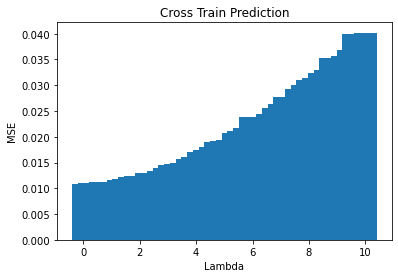

In [199]:
def cross_validation(regression_model, X, y, k_fold = 10):
    """
    partition data X in k_fold equal sized subsets D = {D_1, ..., D_{k_fold}}, 
        fit the model on k_fold-1 subsets (D\D_i), 
        compute MSE on the evaluatin set (D_i),
        return the mean MSE over all subsets D
    """
    data_len = int(y.shape[0]/k_fold)
    permutation = np.random.permutation(y.shape[0]).tolist()
    partition_length=int(y.shape[0]/k_fold)
    partitions=np.zeros((k_fold,partition_length))
    errors=np.zeros(k_fold)
    for i in range(k_fold):
        partitions[i]=permutation[data_len*i:data_len*(i+1)]
    for i in range(k_fold):
        X_train=np.zeros((partition_length*(k_fold-1),X.shape[1]))
        y_train=np.zeros(partition_length*(k_fold-1))
        
        X_test=np.zeros((partition_length,X.shape[1]))
        y_test=np.zeros(partition_length)
        
        for ind,elt in enumerate(partitions[i]):
            X_test[ind]=X[int(elt)]
            y_test[ind]=y[int(elt)]
        
        ind=0
        for j in range(k_fold):
            if i!=j:
                for elt in partitions[j]:
                    X_train[ind]=X[int(elt)]
                    y_train[ind]=y[int(elt)]
                    ind+=1

        regression_model.fit(X_train,y_train)
        yhat=regression_model.predict(X_test)
        errors[i]=MSE(yhat,y_test)
    return np.sum(errors)/k_fold
        

lambdas=np.linspace(0,10,50)
error = np.zeros(lambdas.size)
for ind,l in enumerate(lambdas):
    regression_cross = RidgeRegression(lambda_=lambdas[ind], ftype='lin')
    error[ind] = cross_validation(regression_cross, X_lin, y_lin, k_fold=20)
min_error = error.argmin()

plt.figure()
plt.title('Cross Train Prediction')
lin =plt.bar(lambdas,error)
plt.xlabel('Lambda')
plt.ylabel('MSE')